# Exercise sheet 10
**Hello everyone!**

**Points: 15 (+2)**

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [ADAM](https://adam.unibas.ch/goto_adam_crs_1266890.html), [Piazza](https://piazza.com/class/kzy15kp8s5t6ku), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids22).

Please submit this exercise sheet on **ADAM**.
Naming conventions:

1. Make a folder called "exercise10".
2. Put your submission "Exercise sheet 10.ipynb" in there.
3. Complete the sheet. Only put code or text inside the blocks where "# YOUR CODE HERE" or "YOUR ANSWER HERE" is written. Everything else will be deleted during grading. Don't add new blocks.
4. Then zip the folder called "exercise10". This will create a zip file called "exercise10.zip". Rename that zip file to your Unibas short name, e.g. "blabla0000.zip".

Common mistakes:
- Don't use capital letter for your identification name, or the exercise folder.
- Don't put previous sheet or dataset on the submission folders. Just the sheet, ipynb format.



**Handout date**: 2022/05/17 <br>
**Submission date**: 2022/05/24 <br>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

<p><a href="https://commons.wikimedia.org/wiki/File:Basel_-_M%C3%BCnsterpfalz3.jpg#/media/Datei:Basel_-_Münsterpfalz3.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/1/18/Basel_-_M%C3%BCnsterpfalz3.jpg" alt="Basler Münster mit Pfalz und der Mittleren Rheinbrücke" height="486" width="1280"></a></p>

# Basel's neighborhoods
We are working with a dataset containing information about Basel and its neighborhoods. You can find it here: https://opendata.swiss/de/dataset/kennzahlen-zu-den-basler-wohnvierteln-und-landgemeinden. It's also uploaded as a csv to this folder.

In [2]:
bs = pd.read_csv("basel_neighborhoods.csv", sep=";")
bs.head()

,publikationsjahr,wohnviertel_id,wohnviertel_name,anteil_sozialhilfeempfaenger,anteil_auslaender,anteil_personen_ohne_religionszugehoerigkeit,anteil_personen_in_einpersonenhaushalten,gymnasialquote,altersquotient,anteil_sesshafte,...,baujahr_der_wohngebaeude,anteil_einfamilienhaeuser,anteil_gruenflaechen,flaeche_pro_wohnung,wohnflaeche_pro_person,vermoegenssteuer_pro_veranlagung,einkommenssteuer_pro_veranlagung,erwerbstaetigenquote,arbeitsplaetze_pro_einwohner,arbeitslosenquote
0,2015,1,Altstadt Grossbasel,0.017115,0.251426,0.517930,0.324463,0.777778,0.297921,0.328851,...,1825.400406,0.101626,0.066693,90.808059,55.739958,4297.479726,15795.731129,0.824263,4.354447,0.019072
1,2015,2,Vorstädte,0.031635,0.353328,0.532251,0.345813,0.636364,0.374726,0.279170,...,1899.097967,0.075786,0.194198,81.803421,51.200218,4902.317140,14894.945946,0.779869,4.530718,0.023471
2,2015,7,Bruderholz,0.017662,0.229827,0.458660,0.166817,0.608108,0.442465,0.427310,...,1948.410577,0.734615,0.713769,109.383218,50.067809,8585.686671,18103.101406,0.752834,0.130144,0.023127
3,2015,8,Bachletten,0.022092,0.210320,0.455482,0.224974,0.609137,0.374629,0.421825,...,1934.025590,0.561775,0.408619,93.179580,47.396467,1632.650810,11363.577884,0.790006,0.190061,0.023636
4,2015,10,Iselin,0.089462,0.360277,0.445545,0.284152,0.262357,0.260469,0.331530,...,1937.165632,0.167702,0.375125,68.638626,37.648552,425.867934,6405.308048,0.701177,0.155020,0.042679


## P value (12 points)
Let's see if there's an answer to the following question: Did the amount of green spaces in Basel's neighborhoods increase *significantly* between 2015 and 2021? <br>

The column that measures green spaces (parks and such) is called *anteil_gruenflaechen*.

### Observed difference (1 point)
What is the observed difference between the mean of the amount of green spaces in 2015 and in 2021? <br>
(Hint: Averaged over all neighborhoods)

In [3]:
mean_2015 = bs[bs["publikationsjahr"] == 2015]["anteil_gruenflaechen"].mean()
mean_2021 = bs[bs["publikationsjahr"] == 2021]["anteil_gruenflaechen"].mean()

print(mean_2021 - mean_2015)

0.010221135919047719


In [4]:
assert_almost_equal(mean_2021 - mean_2015, 0.0102, places=2)
assert_almost_equal(mean_2015, 0.3199, places=2)
assert_almost_equal(mean_2021, 0.3301, places=2)

### Thinking about it...
Do you think that this difference points to a strong increase in green spaces between 2015 and 2021? What do you think the p value will be approximately?

Some interesting thoughts by students:

- the percentual change is small, so the p-value will be big
- while the percentual change is small, when we try to understand what the change (1% of the area of Basel) represents, it's actually equivalent to multiple football fields. Maybe that's not so small after all?

### Artificial variables (3 points)
Let's make a new dataframe "neighborhoods" containing the neighborhoods of Basel in a column called "wohnviertel_name". Additionally, it should have a column called "increase_green_space" that has...
* a 1 if the amount of green space increased between 2015 and 2021 for this neighborhood
* a 0 otherwise

In [5]:
bs_2015 = bs[bs["publikationsjahr"] == 2015]
bs_2021 = bs[bs["publikationsjahr"] == 2021]
neighborhoods = bs["wohnviertel_name"].drop_duplicates().to_frame()

def increase(viertel):
    value_2015 = bs_2015[bs_2015["wohnviertel_name"] == viertel]["anteil_gruenflaechen"].iloc[0]
    value_2021 = bs_2021[bs_2021["wohnviertel_name"] == viertel]["anteil_gruenflaechen"].iloc[0]
    if (value_2021 - value_2015) > 0:
        return 1
    return 0

neighborhoods["increase_green_space"] = neighborhoods["wohnviertel_name"].apply(increase)
neighborhoods.head()

,wohnviertel_name,increase_green_space
0,Altstadt Grossbasel,0
1,Vorstädte,1
2,Bruderholz,0
3,Bachletten,1
4,Iselin,0


In [6]:
assert_is_instance(neighborhoods, pd.DataFrame)
assert_equal(neighborhoods[neighborhoods["wohnviertel_name"] == "Bachletten"]["increase_green_space"].iloc[0], 1)
assert_equal(neighborhoods[neighborhoods["wohnviertel_name"] == "Matthäus"]["increase_green_space"].iloc[0], 0)

### Amount of neighborhoods with an increase in green spaces (3 points)
What is the percentage of neighborhoods that had an increase in green spaces from 2015 to 2021? This value will let us calculate the difference to our null hypothesis value.

In [7]:
increase_2021 = neighborhoods["increase_green_space"].mean()
difference_null_hypothesis = increase_2021 - 0.5
print(increase_2021, difference_null_hypothesis)

0.5714285714285714 0.0714285714285714


In [8]:
assert_is_instance(increase_2021, float)
assert_is_instance(difference_null_hypothesis, float)
assert_almost_equal(increase_2021, 0.57142857, places=2)
assert_almost_equal(difference_null_hypothesis, 0.0714285, places=2)

### Calculate the p value (3 points)
What is the p value for there being a significant difference in the amount of green space between 2015 and 2021? <br>
Or: What is the p value for $P(|mean2021 - 0.5| > \text{observed_difference}) $?

In [9]:
N = bs[bs["publikationsjahr"] == 2021]["anteil_gruenflaechen"].count()
t = np.sqrt(N) * difference_null_hypothesis/0.5
p_value = ((1 - (norm.cdf(t) - norm.cdf(-t))))
p_value

0.5126907602619235

In [10]:
assert_is_instance(p_value, float)
assert_almost_equal(p_value, 0.51269, places=2)

### Do we reject or fail to reject the null hypothesis based on our p value? (2 points)
(Hint: Read the question carefully and google it if you're not sure what it means)

In [11]:
null_hypothesis = "fail to reject"

In [12]:
assert_is_instance(null_hypothesis, str)
assert_true(null_hypothesis in ("fail to reject", "reject"))
assert_equal(null_hypothesis, "fail to reject")

### How could we get a lower p value?

Repeat the experiment (compare different years), choose different columns, guerilla gardening...

## Regression (3 points (+2))
### Plot correlation
Make a plot that shows you how income tax (*einkommenssteuer_pro_veranlagung*) and apartment size (*flaeche_pro_wohnung*) are correlated (a scatter plot) for the year 2021.

<AxesSubplot:xlabel='einkommenssteuer_pro_veranlagung'>

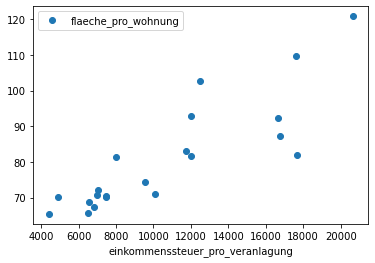

In [13]:
bs_2021 = bs[bs["publikationsjahr"] == 2021]
bs_2021.plot("einkommenssteuer_pro_veranlagung", "flaeche_pro_wohnung", style='o')

### Correlation coefficient (1 point)
What is the correlation coefficient between income tax and apartments size in Basel for 2021?

In [14]:
corr_coeff = bs_2021["einkommenssteuer_pro_veranlagung"].corr(bs_2021["flaeche_pro_wohnung"])
corr_coeff

0.8537433905040707

In [15]:
assert_is_instance(corr_coeff, float)
assert_almost_equal(corr_coeff, 0.85374, places=2)

### Highest correlation (+ 2 bonus points)
What is the highest correlation value between two columns in the bs dataset for the year 2021?

In [16]:
# Code from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corrs = bs_2021.corr().abs()
sol = (corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool))
            .stack()
            .sort_values(ascending=False))
highest_correlation = sol[0]
highest_correlation

C:\Users\Phaina\AppData\Local\Temp/ipykernel_15008/1086808125.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool))


0.9546703408715231

In [29]:
bs[bs["publikationsjahr"] == 2021].corr().replace(to_replace=1.0, value=0).max().max()

0.9546703408715231

In [17]:
assert_is_instance(highest_correlation, float)
assert_almost_equal(highest_correlation, 0.95467, places=2)

### Plot another correlation
Make a plot that shows you how living space per person (*wohnflaeche_pro_person*) and apartment size (*flaeche_pro_wohnung*) are correlated (a scatter plot) for the year 2021.

<AxesSubplot:xlabel='wohnflaeche_pro_person'>

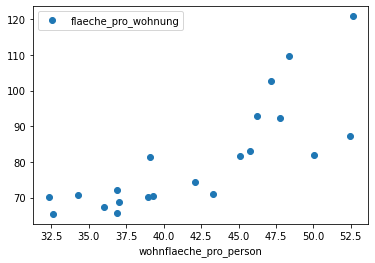

In [18]:
bs_2021.plot("wohnflaeche_pro_person", "flaeche_pro_wohnung", style='o')

What do you notice on this plot? What kind of value do you expect for the correlation coefficient? What could be problematic about this correlation?

Possibly a quadratic (or even exponential!) function, not linear. Outliers might skew regression line.

### Expectations (2 points)
What is the expected value $\hat E$ for the amount of living space for a random person (*wohnflaeche_pro_person*) living in Basel in 2021?

In [19]:
living_space = bs_2021["wohnflaeche_pro_person"].mean()

In [20]:
assert_is_instance(living_space, float)
assert_almost_equal(living_space, 42.1139, places=2)